In [8]:
import numpy as np
from tensorflow import keras
from random import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from matplotlib import pyplot as plt

In [9]:
# Image params
img_rows, img_cols = 28, 28

# Data params
train_file = (r"A:\test\emnist_train\emnist_balanced_train.csv")
test_file = (r"A:\test\emnist_test\emnist_balanced_test.csv")
num_classes = 47
classes = ("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt")

In [11]:
## Prepare input data
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:, 1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [6]:
train_data = np.loadtxt(train_file, skiprows=1, delimiter=',')
x, y = prep_data(train_data)

In [11]:
def model1(input_size,output_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [12]:
model1 = model1([img_rows, img_cols,1],len(classes))

In [13]:
history_model1 = trained = model1.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 69s 766us/sample - loss: 0.9839 - acc: 0.6964 - val_loss: 0.6471 - val_acc: 0.7746- ETA: 9s - loss: 1.0390 - ac - ET - ETA: 1s - loss: 0.992 - ETA: 0s - loss: 0.9861 - acc: 0
Epoch 2/20
90239/90239 [==============================] - 77s 855us/sample - loss: 0.5630 - acc: 0.8097 - val_loss: 0.5425 - val_acc: 0.8092 6s -  - ETA: 2s - loss: 0.5640 - acc - ETA: 1s - loss: 0.5638 - acc: 0.8 - ETA: 1s -
Epoch 3/20
90239/90239 [==============================] - 72s 802us/sample - loss: 0.4826 - acc: 0.8330 - val_loss: 0.4846 - val_acc: 0.8286
Epoch 4/20
90239/90239 [==============================] - 69s 764us/sample - loss: 0.4372 - acc: 0.8453 - val_loss: 0.4749 - val_acc: 0.8346
Epoch 5/20
90239/90239 [==============================] - 70s 771us/sample - loss: 0.4020 - acc: 0.8560 - val_loss: 0.4680 - val_acc: 0.8361
Epoch 6/20
90239/90239 [==============================] - 70s 773us/

In [12]:
# accuracy
def accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

In [13]:
# loss
def loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

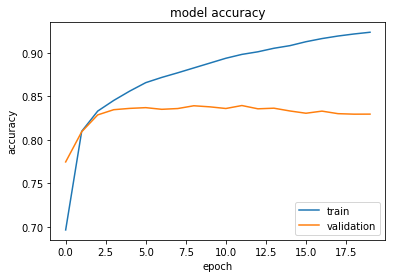

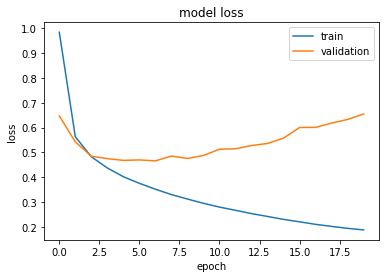

In [16]:
accuracy(history_model1)
loss(history_model1)

In [42]:
## Evaluate model with the test dataset
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x, test_y)
    print("The accuracy of the model is: ",result[1])
    return result

In [43]:
import numpy as np
test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
test_x, test_y = prep_data(test_data)

In [7]:
def model2(input_size,output_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [8]:
model2 = model2([img_rows, img_cols,1],len(classes))

W0118 10:26:48.752113 25684 deprecation.py:506] From C:\Users\vibhu\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
history_model2 = trained = model2.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 95s 1ms/sample - loss: 1.9213 - acc: 0.4393 - val_loss: 0.9024 - val_acc: 0.7226
Epoch 2/20
90239/90239 [==============================] - 108s 1ms/sample - loss: 1.2221 - acc: 0.6182 - val_loss: 0.7574 - val_acc: 0.7582
Epoch 3/20
90239/90239 [==============================] - 106s 1ms/sample - loss: 1.0944 - acc: 0.6556 - val_loss: 0.6779 - val_acc: 0.7800
Epoch 4/20
90239/90239 [==============================] - 108s 1ms/sample - loss: 1.0351 - acc: 0.6717 - val_loss: 0.6433 - val_acc: 0.7886
Epoch 5/20
90239/90239 [==============================] - 104s 1ms/sample - loss: 0.9927 - acc: 0.6829 - val_loss: 0.6157 - val_acc: 0.7966
Epoch 6/20
90239/90239 [==============================] - 108s 1ms/sample - loss: 0.9656 - acc: 0.6911 - val_loss: 0.6067 - val_acc: 0.8014
Epoch 7/20
90239/90239 [==============================] - 108s 1ms/sample - loss: 0.9504 - acc: 0.6954 - val_lo

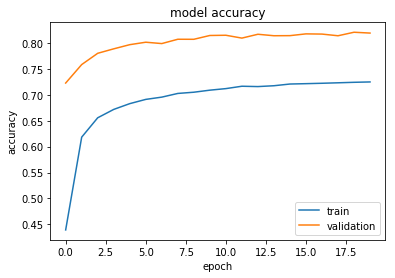

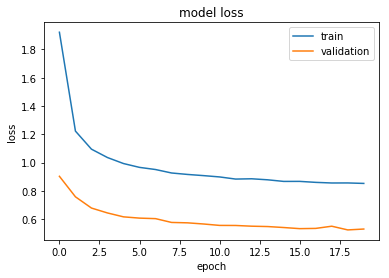

In [14]:
accuracy(history_model2)
loss(history_model2)

In [31]:
eval_model(model2,test_x,test_y)

18799/18799 [==============================] - 5s 289us/sample - loss: 0.5635 - acc: 0.8109
The accuracy of the model is:  0.8108942


[0.5634857957791417, 0.8108942]

In [15]:
def model3(input_size,output_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
#     model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(Flatten())
#     model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model
    

In [16]:
model3 = model3([img_rows, img_cols,1],len(classes))

In [17]:
history_model3 = trained = model3.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 658s 7ms/sample - loss: 0.5961 - acc: 0.8123 - val_loss: 0.4366 - val_acc: 0.8503
Epoch 2/20
90239/90239 [==============================] - 738s 8ms/sample - loss: 0.3499 - acc: 0.8789 - val_loss: 0.3977 - val_acc: 0.8664
Epoch 3/20
90239/90239 [==============================] - 731s 8ms/sample - loss: 0.2452 - acc: 0.9106 - val_loss: 0.4177 - val_acc: 0.8641
Epoch 4/20
90239/90239 [==============================] - 713s 8ms/sample - loss: 0.1657 - acc: 0.9362 - val_loss: 0.4918 - val_acc: 0.8616
Epoch 5/20
90239/90239 [==============================] - 760s 8ms/sample - loss: 0.1131 - acc: 0.9544 - val_loss: 0.5584 - val_acc: 0.8536
Epoch 6/20
90239/90239 [==============================] - 757s 8ms/sample - loss: 0.0847 - acc: 0.9661 - val_loss: 0.6487 - val_acc: 0.8471
Epoch 7/20
90239/90239 [==============================] - 1786s 20ms/sample - loss: 0.0656 - acc: 0.9739 - val

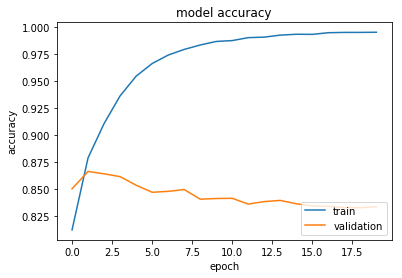

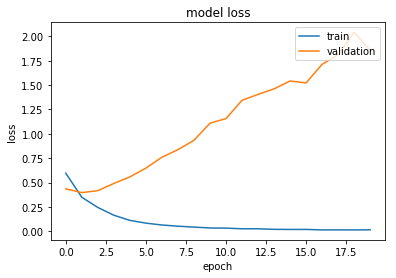

In [18]:
accuracy(history_model3)
loss(history_model3)

In [21]:
eval_model(model3,test_x,test_y)

18799/18799 [==============================] - 23s 1ms/sample - loss: 1.8857 - acc: 0.8348
The accuracy of the model is:  0.8347784


[1.8857239498103626, 0.8347784]

In [22]:
def model4(input_size,output_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [23]:
model4 = model4([img_rows, img_cols,1],len(classes))

In [24]:
history_model4 = trained = model4.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 521s 6ms/sample - loss: 0.7578 - acc: 0.7718 - val_loss: 0.4842 - val_acc: 0.8394
Epoch 2/20
90239/90239 [==============================] - 530s 6ms/sample - loss: 0.4784 - acc: 0.8437 - val_loss: 0.4330 - val_acc: 0.8562
Epoch 3/20
90239/90239 [==============================] - 534s 6ms/sample - loss: 0.4139 - acc: 0.8592 - val_loss: 0.4065 - val_acc: 0.8611
Epoch 4/20
90239/90239 [==============================] - 530s 6ms/sample - loss: 0.3743 - acc: 0.8706 - val_loss: 0.3905 - val_acc: 0.8657
Epoch 5/20
90239/90239 [==============================] - 530s 6ms/sample - loss: 0.3430 - acc: 0.8779 - val_loss: 0.3854 - val_acc: 0.8668
Epoch 6/20
90239/90239 [==============================] - 530s 6ms/sample - loss: 0.3183 - acc: 0.8864 - val_loss: 0.3926 - val_acc: 0.8648
Epoch 7/20
90239/90239 [==============================] - 529s 6ms/sample - loss: 0.3001 - acc: 0.8917 - val_l

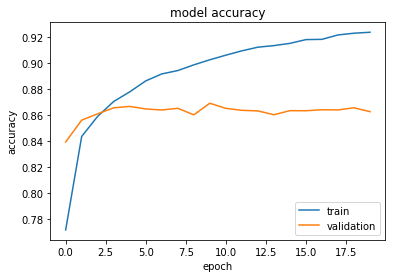

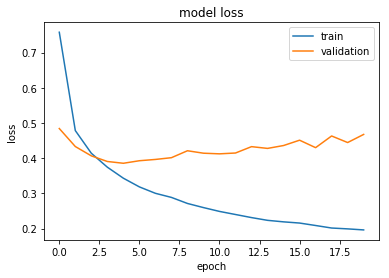

In [25]:
accuracy(history_model4)
loss(history_model4)

In [26]:
eval_model(model4,test_x,test_y)

18799/18799 [==============================] - 26s 1ms/sample - loss: 0.4924 - acc: 0.8620
The accuracy of the model is:  0.86196077


[0.49239890185199686, 0.86196077]

In [28]:
def model5(input_size,output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))


    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [29]:
model5 = model5([img_rows, img_cols,1],len(classes))

In [30]:
history_model5 = trained = model5.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 265s 3ms/sample - loss: 1.0269 - acc: 0.7065 - val_loss: 0.4442 - val_acc: 0.8472
Epoch 2/20
90239/90239 [==============================] - 271s 3ms/sample - loss: 0.5282 - acc: 0.8222 - val_loss: 0.4010 - val_acc: 0.8598
Epoch 3/20
90239/90239 [==============================] - 278s 3ms/sample - loss: 0.4487 - acc: 0.8424 - val_loss: 0.3673 - val_acc: 0.8680
Epoch 4/20
90239/90239 [==============================] - 283s 3ms/sample - loss: 0.4071 - acc: 0.8567 - val_loss: 0.3294 - val_acc: 0.8785
Epoch 5/20
90239/90239 [==============================] - 290s 3ms/sample - loss: 0.3789 - acc: 0.8643 - val_loss: 0.3189 - val_acc: 0.8827
Epoch 6/20
90239/90239 [==============================] - 289s 3ms/sample - loss: 0.3595 - acc: 0.8698 - val_loss: 0.3299 - val_acc: 0.8806
Epoch 7/20
90239/90239 [==============================] - 294s 3ms/sample - loss: 0.3455 - acc: 0.8754 - val_l

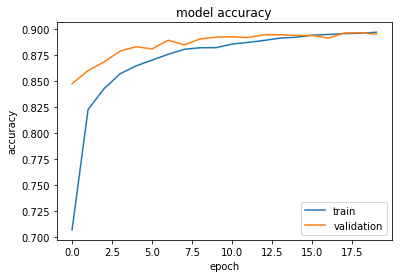

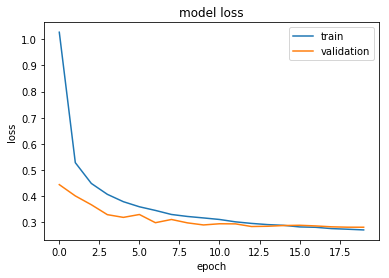

In [31]:
accuracy(history_model5)
loss(history_model5)

In [32]:
eval_model(model5,test_x,test_y)

18799/18799 [==============================] - 56s 3ms/sample - loss: 0.2953 - acc: 0.8948
The accuracy of the model is:  0.8948348


[0.295271482146435, 0.8948348]

In [33]:
model5.save("model5_complex.h5")

In [34]:
def model6(input_size,output_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [35]:
model6 = model6([img_rows, img_cols,1],len(classes))

In [36]:
history_model6 = trained = model6.fit(x,y,epochs=20,validation_split=0.20)

Train on 90239 samples, validate on 22560 samples
Epoch 1/20
90239/90239 [==============================] - 1378s 15ms/sample - loss: 2.2897 - acc: 0.7011 - val_loss: 0.5487 - val_acc: 0.8278
Epoch 2/20
90239/90239 [==============================] - 1358s 15ms/sample - loss: 0.5508 - acc: 0.8242 - val_loss: 0.5072 - val_acc: 0.8326
Epoch 3/20
90239/90239 [==============================] - 1407s 16ms/sample - loss: 0.5041 - acc: 0.8346 - val_loss: 0.4710 - val_acc: 0.8409
Epoch 4/20
90239/90239 [==============================] - 1345s 15ms/sample - loss: 0.4571 - acc: 0.8480 - val_loss: 0.4299 - val_acc: 0.8541
Epoch 5/20
90239/90239 [==============================] - 1380s 15ms/sample - loss: 0.4119 - acc: 0.8588 - val_loss: 0.4171 - val_acc: 0.8586
Epoch 6/20
90239/90239 [==============================] - 1463s 16ms/sample - loss: 0.3836 - acc: 0.8670 - val_loss: 0.4325 - val_acc: 0.8598
Epoch 7/20
90239/90239 [==============================] - 1425s 16ms/sample - loss: 0.3565 - acc: 

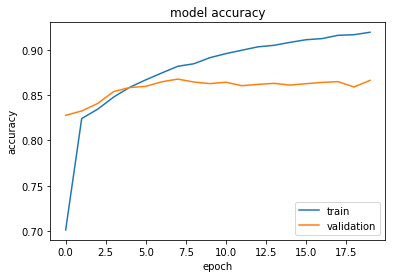

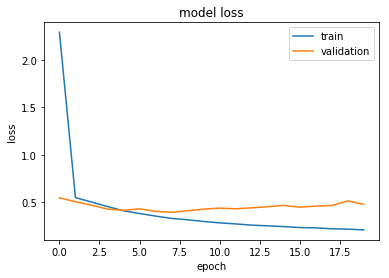

In [37]:
accuracy(history_model6)
loss(history_model6)

In [38]:
eval_model(model6,test_x,test_y)

18799/18799 [==============================] - 48s 3ms/sample - loss: 0.5050 - acc: 0.8634
The accuracy of the model is:  0.863397


[0.5050101600461732, 0.863397]

In [37]:

def allcnn(input_size,output_size):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(input_size[0], input_size[1], input_size[2])))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

#saved as "allcnn_emnist.h5" model

In [ ]:
def create_complex_model(input_size,output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))


    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (1, 1), padding = 'valid',activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

#saved as "complex_emnist.h5" model

In [5]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('model5_complex.h5') #this is model5,lets test some images with it

In [6]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)       

In [15]:
predictions = loaded_model.predict(test_x)

In [14]:
## Convert One-Hot-Encoded values back to real values
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [23]:
## Plot an image with it's correct value
def show_img1(img,label,predictions):
    img_flip = np.transpose(img, axes=[1,0])
    preds = str(classes[np.argmax(predictions[label])])
    actual = str(classes[decode_label(test_y[label])+1])
    plt.title("{} {}".format("Predicted: " +preds,"\n""Actual: " +actual), color=("green" if preds==actual else "red"))
    plt.imshow(img_flip, cmap='Greys_r')

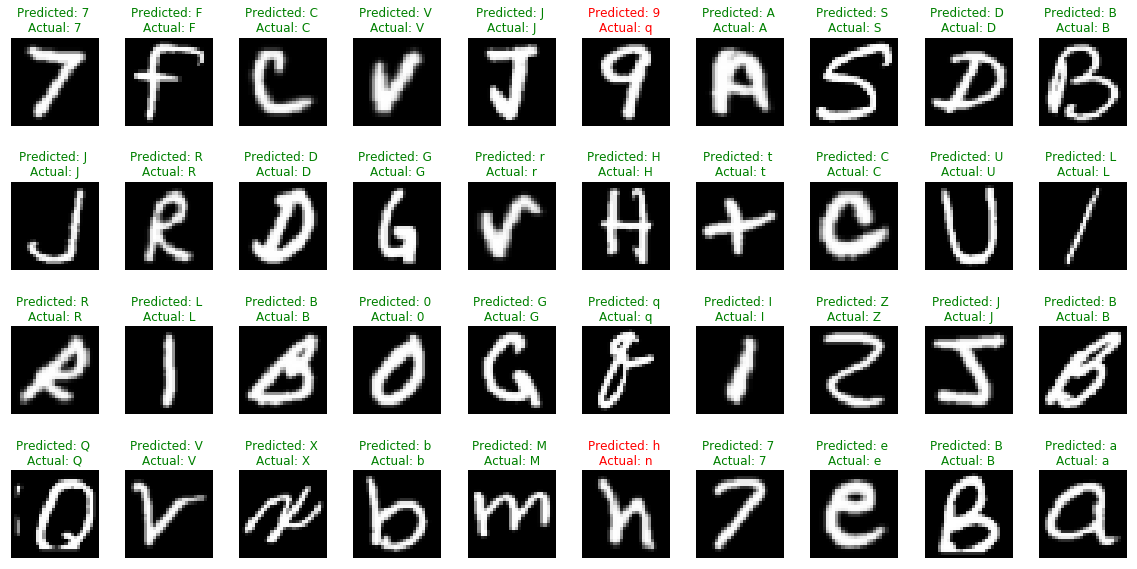

In [35]:
from random import randint
fig = plt.figure(figsize=(20,10))
for idx in np.arange(40):
    rnd_number = randint(0,len(test_x))
    fig.add_subplot(4,10,idx+1, xticks=[], yticks=[])
    plt.axis('off')
    show_img1(np.squeeze(test_x[rnd_number]),rnd_number,predictions)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [20]:
loaded_model1 = tf.keras.models.load_model('allcnn_emnist.h5') #lets check with other saved model

In [26]:
predictions1 = loaded_model1.predict(test_x)

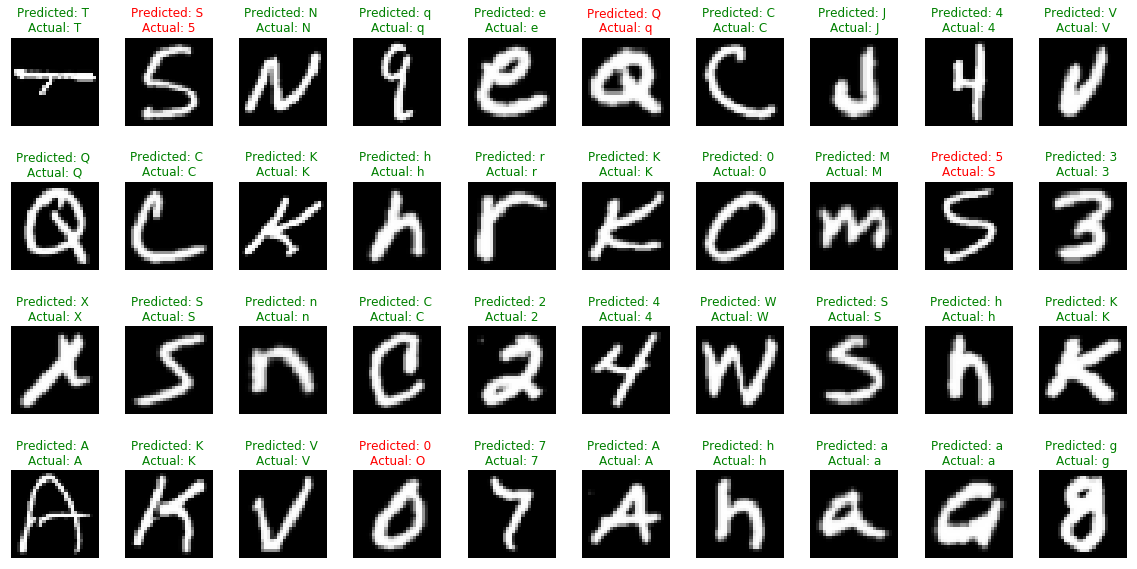

In [36]:

fig = plt.figure(figsize=(20,10))
for idx in np.arange(40):
    rnd_number = randint(0,len(test_x))
    fig.add_subplot(4,10,idx+1, xticks=[], yticks=[])
    plt.axis('off')
    show_img1(np.squeeze(test_x[rnd_number]),rnd_number,predictions1)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [38]:
loaded_model3 = tf.keras.models.load_model('complex_emnist.h5') #lets check with other saved model

In [39]:
predictions2 = loaded_model3.predict(test_x)

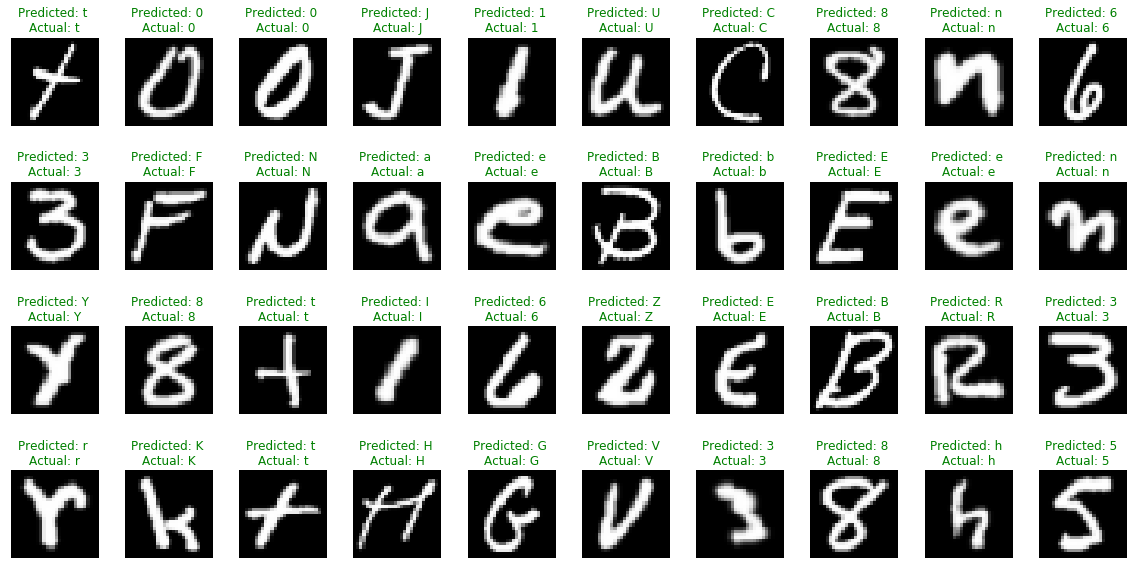

In [40]:

fig = plt.figure(figsize=(20,10))
for idx in np.arange(40):
    rnd_number = randint(0,len(test_x))
    fig.add_subplot(4,10,idx+1, xticks=[], yticks=[])
    plt.axis('off')
    show_img1(np.squeeze(test_x[rnd_number]),rnd_number,predictions2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [44]:
eval_model(loaded_model3,test_x,test_y)

18799/18799 [==============================] - 30s 2ms/sample - loss: 0.3062 - acc: 0.8989
The accuracy of the model is:  0.8988776


[0.30622104222175, 0.8988776]